'''<br>
Author: Nikhil Patil<br>
Date: 14-11-2024<br>
Last Modified by: Nikhil Patil<br>
Last Modified time: 14-11-2024 <br>
Title : Python program to predict whether client will subscribe to term deposit `Logistic Regression`<br>

'''


### Importing Libraries

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score

In [53]:
# Suppress specific future warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Importing data

In [ ]:
bank_df = pd.read_csv('bank.csv', delimiter=';')
display(bank_df.head())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### Display Stats

In [55]:
bank_df.info()
print("\nStats for the dataset are:")
bank_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB

Stats for the dataset are:


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [56]:
label_encoder = LabelEncoder()
for column in bank_df.select_dtypes(include=['object']).columns:
    bank_df[column] = label_encoder.fit_transform(bank_df[column])

In [57]:
display(bank_df.head())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


### Data Visualization

**Correlation Matrix**

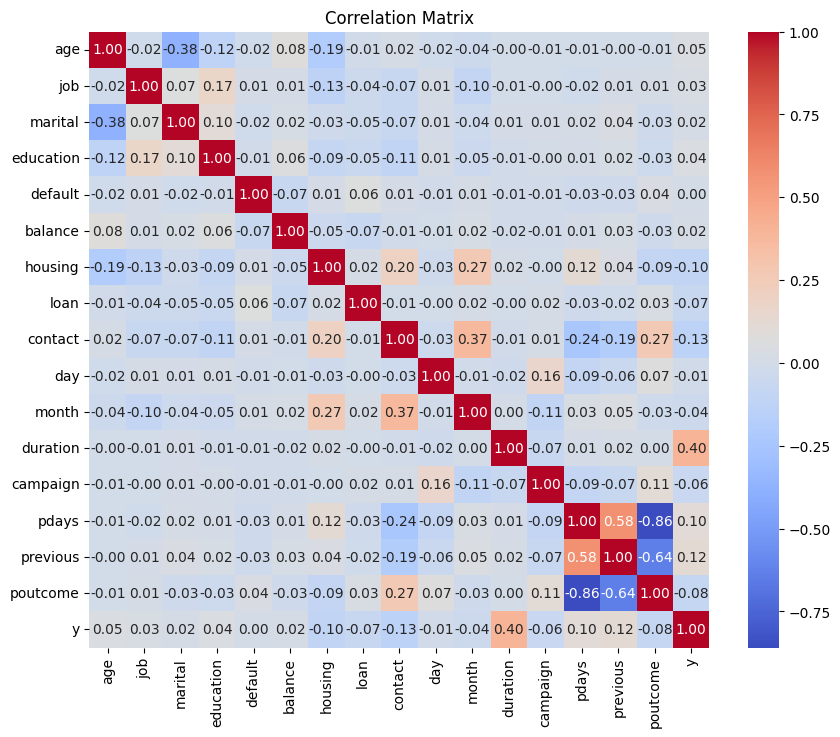

In [58]:
# Calculate
corr_matrix = bank_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Box plot for detecting outliers**

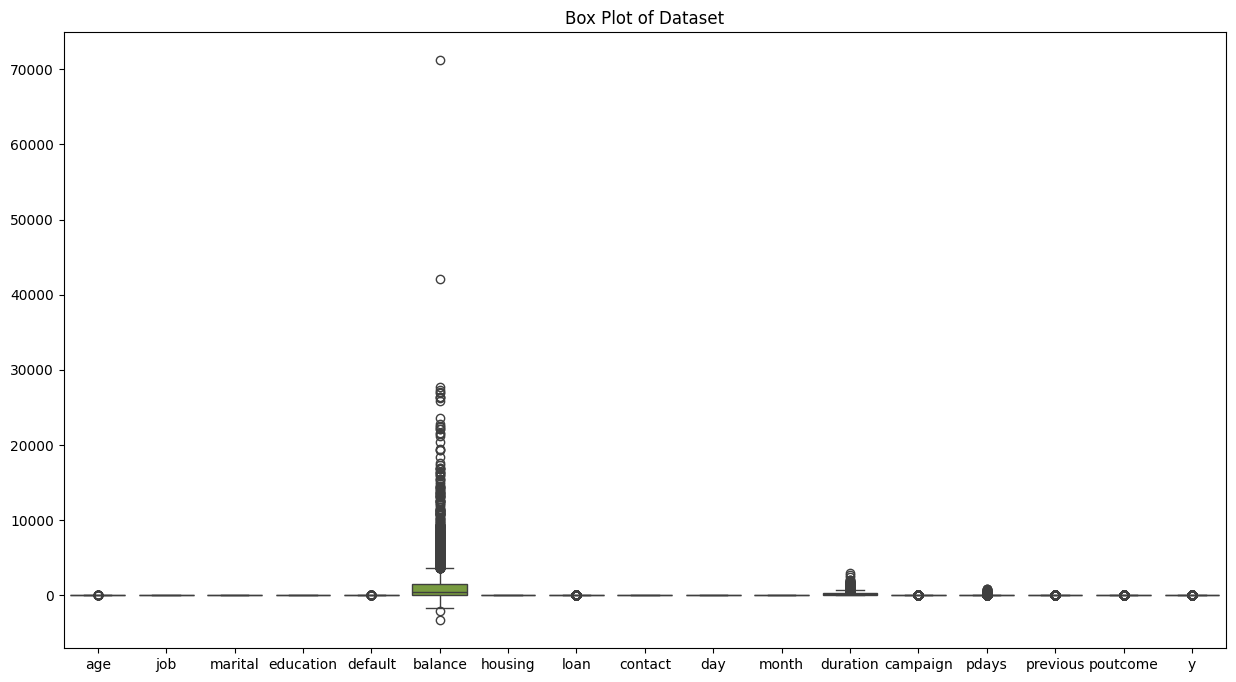

In [60]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=bank_df)
plt.title('Box Plot of Dataset')
plt.show()

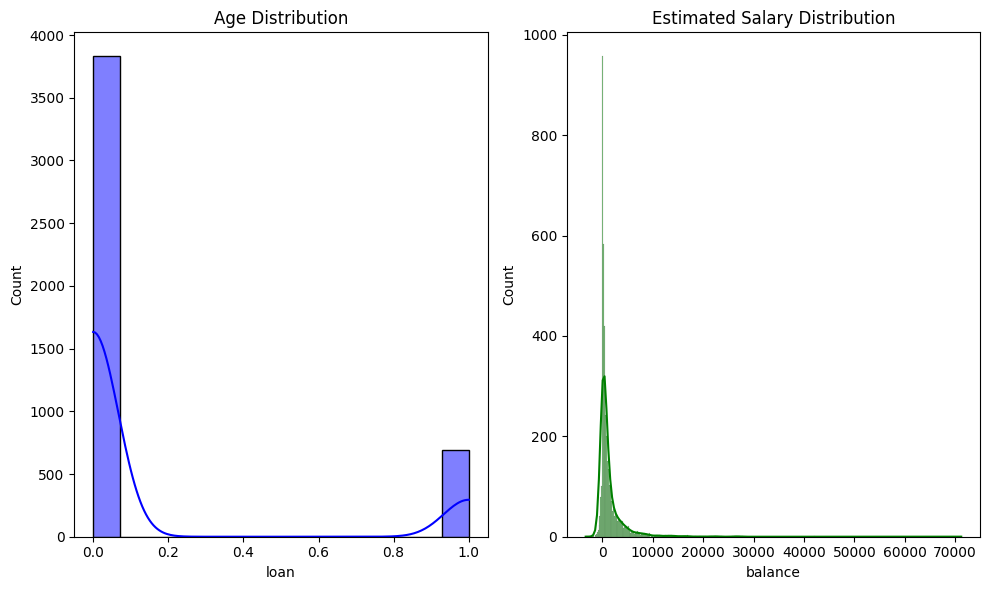

In [61]:
plt.figure(figsize=(10, 6))

# Plotting histograms of 'Age' and 'EstimatedSalary'
plt.subplot(1, 2, 1)
sns.histplot(bank_df['loan'], kde=True, color='blue')
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(bank_df['balance'], kde=True, color='green')
plt.title('Estimated Salary Distribution')

plt.tight_layout()
plt.show()

### Encoding the data

### Display Correlation Matrix

In [62]:
correlation_matrix = bank_df.corr()
print(correlation_matrix)

                age       job   marital  education   default   balance  \
age        1.000000 -0.021500 -0.381485  -0.121613 -0.017885  0.083820   
job       -0.021500  1.000000  0.069390   0.170160  0.008324  0.009797   
marital   -0.381485  0.069390  1.000000   0.102714 -0.020745  0.024971   
education -0.121613  0.170160  0.102714   1.000000 -0.010534  0.057725   
default   -0.017885  0.008324 -0.020745  -0.010534  1.000000 -0.070886   
balance    0.083820  0.009797  0.024971   0.057725 -0.070886  1.000000   
housing   -0.193888 -0.128353 -0.029851  -0.087070  0.006881 -0.050227   
loan      -0.011250 -0.040245 -0.045210  -0.054086  0.063994 -0.071349   
contact    0.015161 -0.074068 -0.068236  -0.110554  0.008448 -0.009665   
day       -0.017853  0.012865  0.008794   0.014926 -0.013261 -0.008677   
month     -0.040714 -0.096613 -0.035855  -0.050086  0.014297  0.023113   
duration  -0.002367 -0.006739  0.006619  -0.014878 -0.011615 -0.015950   
campaign  -0.005148 -0.002739  0.00591

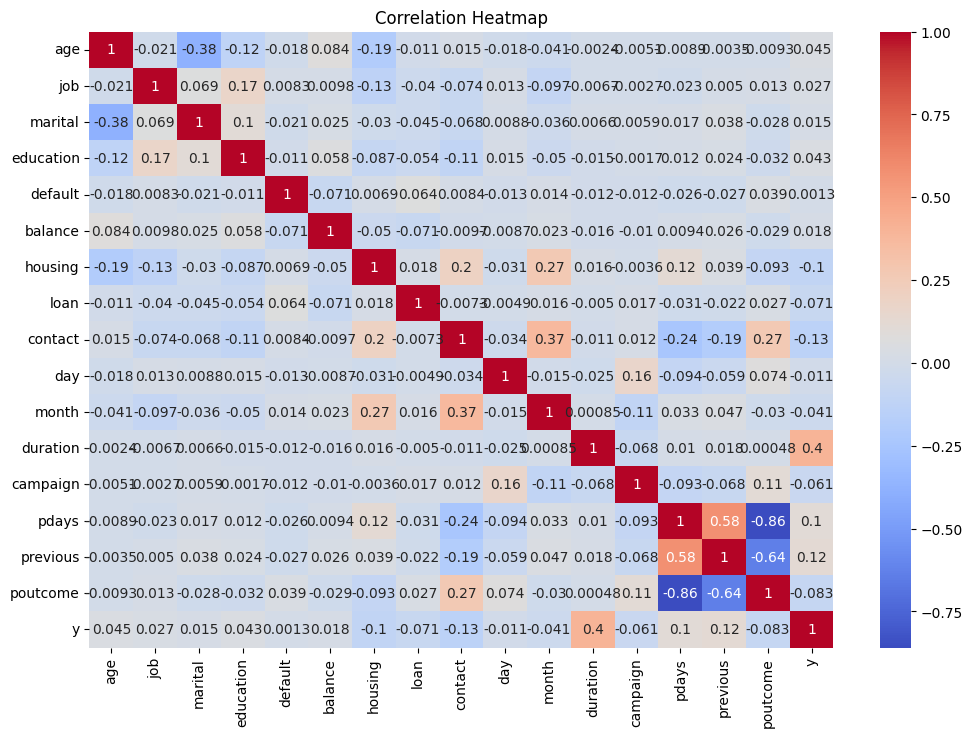

In [63]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Training

**Define Features and Target**

In [131]:
X = bank_df.drop('y', axis = 1)
y = bank_df['y']

**Split the dataset into training and testing sets**

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [133]:
feature_names = X.columns

**Feature scaling using StandardScaler**

In [134]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Fit the model**

In [135]:
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

**Predicting the test results**

In [136]:
y_pred = model.predict(X_test)

**Displaying Metrics**

In [137]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [138]:
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 88.24%
Confusion Matrix:
[[966  27]
 [106  32]]


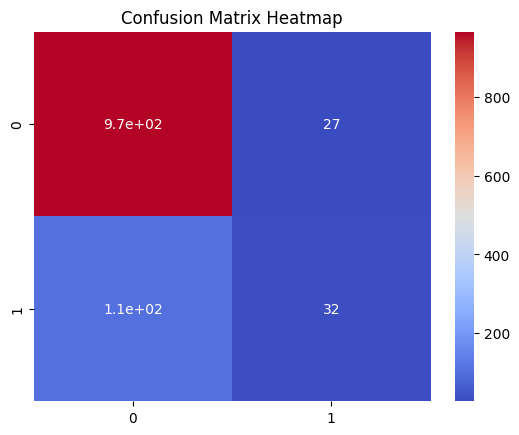

In [139]:
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [140]:
print(f'The report of the model is:\n{report}')

The report of the model is:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       993
           1       0.54      0.23      0.32       138

    accuracy                           0.88      1131
   macro avg       0.72      0.60      0.63      1131
weighted avg       0.86      0.88      0.86      1131



In [141]:
X_test = scaler.inverse_transform(X_test)

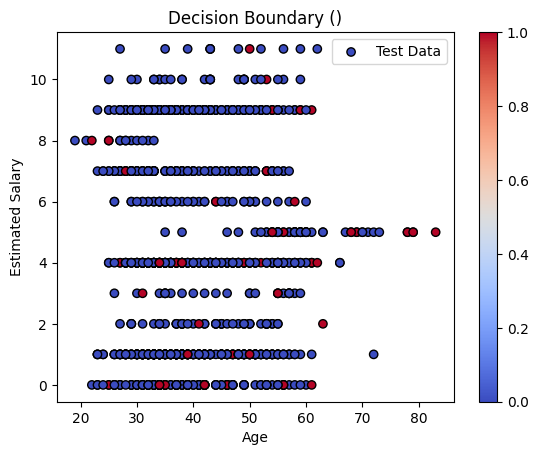

In [142]:
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap='coolwarm', label='Test Data')
plt.colorbar(scatter)
plt.title(f'Decision Boundary ()')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Predicted probabilities for ROC**

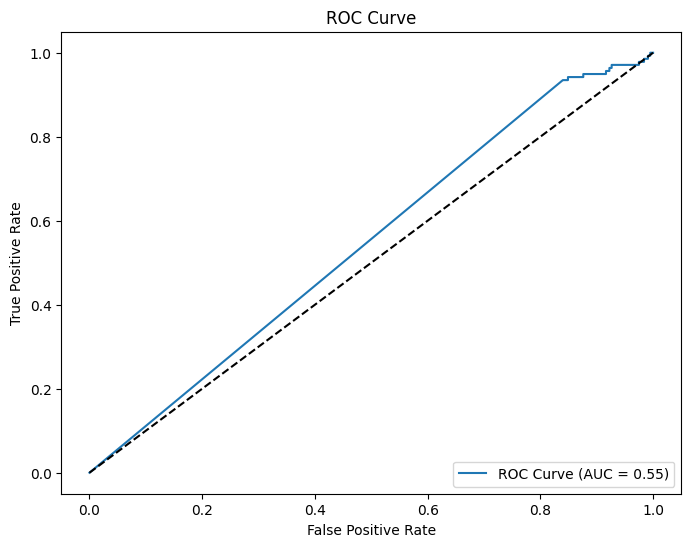

In [143]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


**Precision Recall Curve**

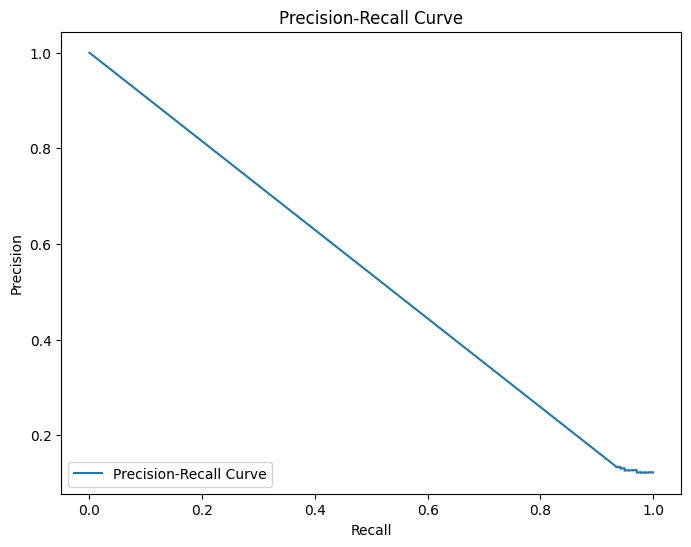

In [144]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


In [145]:
X_train = scaler.inverse_transform(X_train)

**Feature Importance**

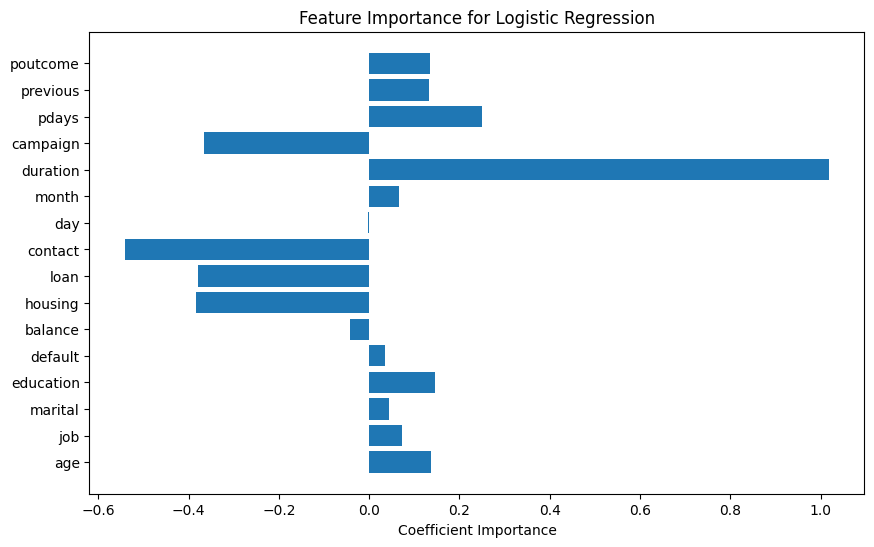

In [151]:
# Get coefficients from the Logistic Regression model
coefficients = model.coef_[0]

# Create a bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Importance')
plt.title('Feature Importance for Logistic Regression')
plt.show()
